<a href="https://colab.research.google.com/github/Njeri-Macharia/data-science-bootcamp/blob/main/SentimentAnalysisTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [1]:
!pip install nltk

## Import the Library

In [10]:
# This data includes pre-trained models, corpora, and other resources that NLTK uses to perform various NLP tasks.
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk.classify.util





In [3]:
#  downloads all the nltk corpus for the first time.
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Data Manipulation

In [4]:
# get the csv dataset and read it
data=pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


# pre_processing Data

In [5]:
def process_text(text):
  # tokenization
  tokens=word_tokenize(text.lower())

  # stop words removal
  filtered_token=[token for token in tokens if token not in stopwords.words('english')]

  # lemmmatizer
  lemmatizer=WordNetLemmatizer()
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in filtered_token]

  # join the tokens back into a string
  refined_text= ' '.join(lemmatized_tokens)
  return refined_text



In [6]:
data['refined_text']=data['reviewText'].apply(process_text)
data.head()

,reviewText,Positive,refined_text
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...
1,This is a pretty good version of the game for ...,1,pretty good version game free . lot different ...
2,this is a really cool game. there are a bunch ...,1,really cool game . bunch level find golden egg...
3,"This is a silly game and can be frustrating, b...",1,"silly game frustrating , lot fun definitely re..."
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad . hr fun . grandkids love . ...


# Analysis itself

In [7]:
# initialize nltk sentiment analyzer
analyzer=SentimentIntensityAnalyzer()

# function
def get_sentiment_score(text):
  sentiment_score=analyzer.polarity_scores(text)
  sentiment = 1 if sentiment_score['pos'] > 0 else 0

  return sentiment

data['sentiment']=data['reviewText'].apply(get_sentiment_score)
data.head()


,reviewText,Positive,refined_text,sentiment
0,This is a one of the best apps acording to a b...,1,one best apps acording bunch people agree bomb...,1
1,This is a pretty good version of the game for ...,1,pretty good version game free . lot different ...,1
2,this is a really cool game. there are a bunch ...,1,really cool game . bunch level find golden egg...,1
3,"This is a silly game and can be frustrating, b...",1,"silly game frustrating , lot fun definitely re...",1
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad . hr fun . grandkids love . ...,1


## Testing the Model

In [12]:

# Define test sentences
test_sentences = [
    "This is an amazing product!",
    "This is a bad product.",
    "This product is okay.",
    "I absolutely love this!",
    "I hate this product."
]

# Analyze and print sentiment scores
for sentence in test_sentences:
    # Tokenize the sentence (optional but recommended for better accuracy)
    tokens = word_tokenize(sentence)
    # Get sentiment scores
    scores = analyzer.polarity_scores(" ".join(tokens)) # Join tokens back into a string

    # Print results
    print(f"Sentence: {sentence}")
    print(f"Sentiment Scores: {scores}")
    print(f"Overall Sentiment: {'Positive' if scores['compound'] > 0 else 'Negative' if scores['compound'] < 0 else 'Neutral'}\n")

Sentence: This is an amazing product!
Sentiment Scores: {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}
Overall Sentiment: Positive

Sentence: This is a bad product.
Sentiment Scores: {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
Overall Sentiment: Negative

Sentence: This product is okay.
Sentiment Scores: {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}
Overall Sentiment: Positive

Sentence: I absolutely love this!
Sentiment Scores: {'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.6989}
Overall Sentiment: Positive

Sentence: I hate this product.
Sentiment Scores: {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
Overall Sentiment: Negative



## results analysis and Ploting

In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(data['Positive'], data['sentiment']))

[[ 1377  3390]
 [  620 14613]]


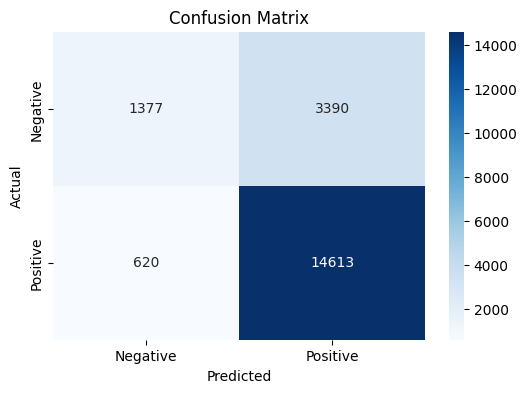

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(data['Positive'], data['sentiment'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
